#### Importing the Basics

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, metrics

#### Reading the data and creating additional Colunms

In [174]:
df = pd.read_csv("loan.csv")
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

#### Checking cells for missing values and filling them

In [175]:
df.isnull().sum()
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount.mean())
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

#### Selecting input & output values

In [176]:
X = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:, 12].values

#### Grouping Number of people by Gender

Loan_Status
N    192
Y    422
Name: Gender, dtype: int64


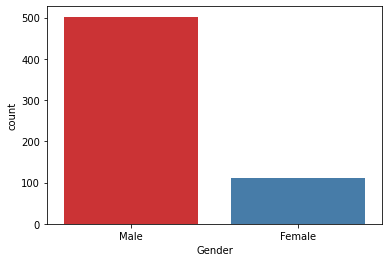

In [177]:
print(df.groupby(['Loan_Status'])['Gender'].count())
sns.countplot(x='Gender', data=df, palette='Set1')
plt.show()

#### Grouping Number of people by Marital Status

Loan_Status
N    192
Y    422
Name: Married, dtype: int64


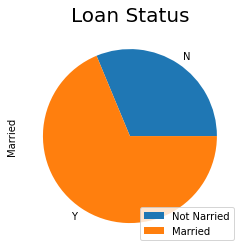

In [178]:
print(df.groupby(['Loan_Status'])['Married'].count())
df.groupby(['Loan_Status'])['Married'].count().plot(kind="pie")
plt.title("Loan Status", size=20)
plt.legend(loc="lower right",labels=["Not Narried", "Married"])
plt.show()

#### Grouping Number of people by Number of Dependents

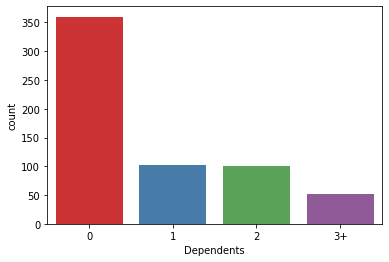

In [179]:
sns.countplot(x='Dependents', data=df, palette='Set1')

#### Grouping Number of people by Employment type

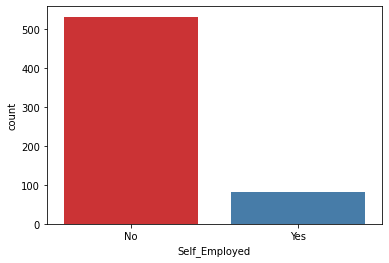

In [180]:
sns.countplot(x='Self_Employed', data=df, palette='Set1')

#### Splitting our dataset into Training and Test

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder, StandardScaler
LabelEncoder_x = LabelEncoder()
LabelEncoder_y = LabelEncoder()

#### Tranforming the categorical data into numerical encodings & Scaling the data accordingly

In [182]:
for i in range(0, 5):
  X_train[:,i] = LabelEncoder_x.fit_transform(X_train[:,i])
  X_train[:,7] = LabelEncoder_x.fit_transform(X_train[:,7])
  X_test[:,i] = LabelEncoder_x.fit_transform(X_test[:,i])
  X_test[:,7] = LabelEncoder_x.fit_transform(X_test[:,7])

y_train = LabelEncoder_y.fit_transform(y_train)
y_test = LabelEncoder_y.fit_transform(y_test)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

#### Logistic Regression Method

In [187]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"Accuracy is: {metrics.accuracy_score(y_pred, y_test)}")

Accuracy is: 0.8130081300813008


#### K- Nearest neighbors Classifier Method

In [183]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Accuracy is: {metrics.accuracy_score(y_pred, y_test)}")

Accuracy is: 0.7967479674796748


#### Gradient Booster Classifier Method

In [188]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(f"Accuracy is: {metrics.accuracy_score(y_pred, y_test)}")

Accuracy is: 0.7235772357723578


#### Random Forest Classifier Method

In [184]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Accuracy is: {metrics.accuracy_score(y_pred, y_test)}")

Accuracy is: 0.7317073170731707


#### Naive Bayes Classifier Method

In [185]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f"Accuracy is: {metrics.accuracy_score(y_pred, y_test)}")

Accuracy is: 0.8130081300813008


#### Decision Tree Classifier Method

In [186]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f"Accuracy is: {metrics.accuracy_score(y_pred, y_test)}")

Accuracy is: 0.6504065040650406
